In [0]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
import numpy as np

In [333]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [334]:
waterUsage = pd.read_csv('/content/drive/My Drive/cmpe256-data/water-usage-data.csv',low_memory=False)
waterUsage

,Year,STATE,STATEFIPS,COUNTYFIPS,FIPS,State-County Name,TP-TotPop,TO-WGWFr,TO-WGWSa,TO-WGWTo,TO-WSWFr,TO-WSWSa,TO-WSWTo,TO-WFrTo,TO-WSaTo,TO-WTotl
0,2005,CA,6,1,6001,California-Alameda County,1448.905,64.48,0.00,64.48,107.28,0.00,107.28,171.76,0.00,171.76
1,2005,CA,6,3,6003,California-Alpine County,1.159,0.03,0.00,0.03,15.08,0.00,15.08,15.11,0.00,15.11
2,2005,CA,6,5,6005,California-Amador County,38.471,4.04,0.00,4.04,20.02,0.00,20.02,24.06,0.00,24.06
3,2005,CA,6,7,6007,California-Butte County,214.185,308.21,0.38,308.59,481.35,0.00,481.35,789.56,0.38,789.94
4,2005,CA,6,9,6009,California-Calaveras County,46.871,7.40,0.00,7.40,9.89,0.00,9.89,17.29,0.00,17.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,2015,CA,6,107,6107,Tulare County,459.863,1257.66,0.00,1257.66,274.66,0.00,274.66,1532.32,0.00,1532.32
170,2015,CA,6,109,6109,Tuolumne County,53.709,4.39,0.00,4.39,22.38,0.00,22.38,26.77,0.00,26.77
171,2015,CA,6,111,6111,Ventura County,850.536,130.83,11.00,141.83,109.28,61.86,171.14,240.11,72.86,312.97
172,2015,CA,6,113,6113,Yolo County,213.016,209.00,0.00,209.00,393.43,0.00,393.43,602.43,0.00,602.43


In [335]:
waterUsage.head().T

,0,1,2,3,4
Year,2005,2005,2005,2005,2005
STATE,CA,CA,CA,CA,CA
STATEFIPS,6,6,6,6,6
COUNTYFIPS,1,3,5,7,9
FIPS,6001,6003,6005,6007,6009
State-County Name,California-Alameda County,California-Alpine County,California-Amador County,California-Butte County,California-Calaveras County
TP-TotPop,1448.9,1.159,38.471,214.185,46.871
TO-WGWFr,64.48,0.03,4.04,308.21,7.4
TO-WGWSa,0,0,0,0.38,0
TO-WGWTo,64.48,0.03,4.04,308.59,7.4


In [336]:
countyCodes = pd.read_csv('/content/drive/My Drive/cmpe256-data/County_codes.csv',low_memory=False)
countyCodes.head()

,County,CountyCode
0,Alameda,6001
1,Amador,6005
2,Butte,6007
3,Calaveras,6009
4,California/Statewide,6000


In [337]:
countyCodes.CountyCode

0     6001
1     6005
2     6007
3     6009
4     6000
5     6011
6     6013
7     6015
8     6017
9     6019
10    6021
11    6023
12    6025
13    6027
14    6029
15    6031
16    6033
17    6035
18    6037
19    6039
20    6041
21    6043
22    6045
23    6047
24    6049
25    6051
26    6053
27    6055
28    6057
29    6059
30    6061
31    6063
32    6065
33    6067
34    6069
35    6071
36    6073
37    6075
38    6077
39    6079
40    6081
41    6083
42    6085
43    6087
44    6089
45    6093
46    6095
47    6097
48    6099
49    6101
50    6103
51    6105
52    6107
53    6109
54    6111
55    6113
56    6115
Name: CountyCode, dtype: int64

In [338]:

waterUsage_county = pd.merge(waterUsage,countyCodes,how='inner', left_on=['FIPS'], right_on=['CountyCode'])
waterUsage_county.head()

,Year,STATE,STATEFIPS,COUNTYFIPS,FIPS,State-County Name,TP-TotPop,TO-WGWFr,TO-WGWSa,TO-WGWTo,TO-WSWFr,TO-WSWSa,TO-WSWTo,TO-WFrTo,TO-WSaTo,TO-WTotl,County,CountyCode
0,2005,CA,6,1,6001,California-Alameda County,1448.905,64.48,0.00,64.48,107.28,0.0,107.28,171.76,0.00,171.76,Alameda,6001
1,2010,CA,6,1,6001,Alameda County,1510.271,42.71,3.42,46.13,208.76,0.0,208.76,251.47,3.42,254.89,Alameda,6001
2,2015,CA,6,1,6001,Alameda County,1638.215,29.73,5.39,35.12,149.09,0.0,149.09,178.82,5.39,184.21,Alameda,6001
3,2005,CA,6,5,6005,California-Amador County,38.471,4.04,0.00,4.04,20.02,0.0,20.02,24.06,0.00,24.06,Amador,6005
4,2010,CA,6,5,6005,Amador County,38.091,7.67,0.00,7.67,24.70,0.0,24.70,32.37,0.00,32.37,Amador,6005


In [339]:
waterUsage.shape

(174, 16)

In [340]:
waterUsage.columns

Index(['Year', 'STATE', 'STATEFIPS', 'COUNTYFIPS', 'FIPS', 'State-County Name',
       'TP-TotPop', 'TO-WGWFr', 'TO-WGWSa', 'TO-WGWTo', 'TO-WSWFr', 'TO-WSWSa',
       'TO-WSWTo', 'TO-WFrTo', 'TO-WSaTo', 'TO-WTotl'],
      dtype='object')

In [341]:
waterUsage.FIPS.unique()

array([6001, 6003, 6005, 6007, 6009, 6011, 6013, 6015, 6017, 6019, 6021,
       6023, 6025, 6027, 6029, 6031, 6033, 6035, 6037, 6039, 6041, 6043,
       6045, 6047, 6049, 6051, 6053, 6055, 6057, 6059, 6061, 6063, 6065,
       6067, 6069, 6071, 6073, 6075, 6077, 6079, 6081, 6083, 6085, 6087,
       6089, 6091, 6093, 6095, 6097, 6099, 6101, 6103, 6105, 6107, 6109,
       6111, 6113, 6115])

In [342]:
columns = ['Year','COUNTYFIPS','TP-TotPop','TO-WGWTo','TO-WSWTo','TO-WTotl']
filter_water_usage = waterUsage[columns]
filter_water_usage.head()

,Year,COUNTYFIPS,TP-TotPop,TO-WGWTo,TO-WSWTo,TO-WTotl
0,2005,1,1448.905,64.48,107.28,171.76
1,2005,3,1.159,0.03,15.08,15.11
2,2005,5,38.471,4.04,20.02,24.06
3,2005,7,214.185,308.59,481.35,789.94
4,2005,9,46.871,7.40,9.89,17.29


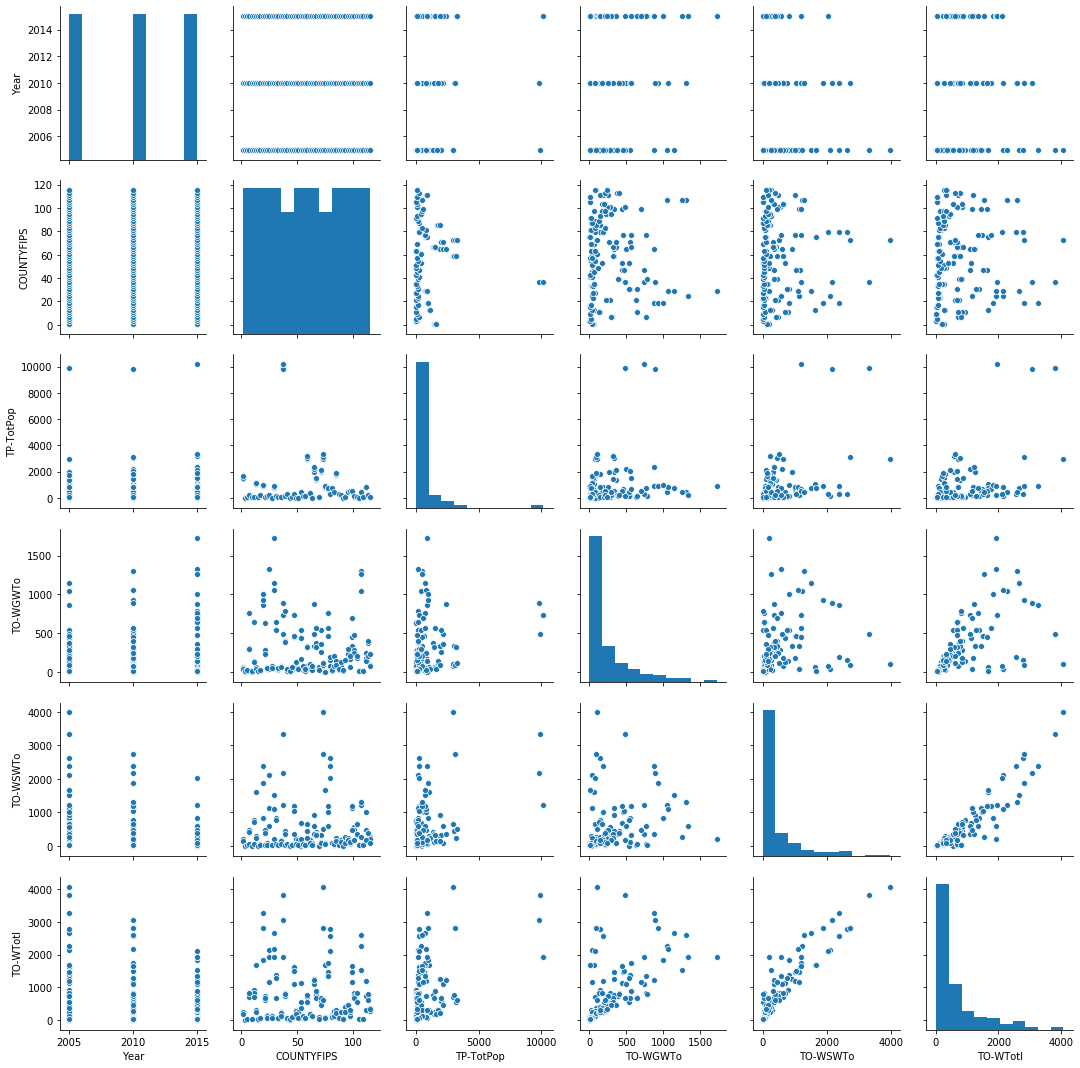

In [343]:
sns.pairplot(filter_water_usage)

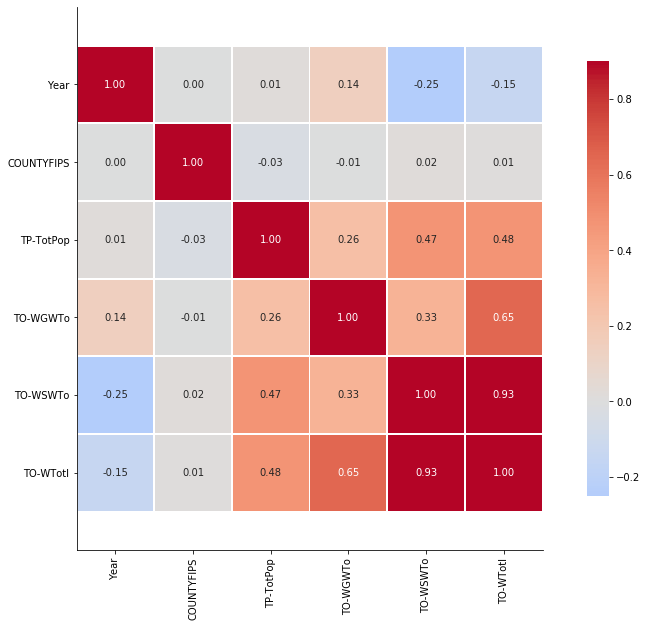

In [344]:
corr = filter_water_usage.corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=.9, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 10)

In [345]:
country_reservoir = pd.read_csv('/content/drive/My Drive/cmpe256-data/ReservoirSensor-County.csv',low_memory=False)
country_reservoir.head()

,Station,County
0,KLM,SISKIYOU
1,GBR,SISKIYOU
2,IRG,SISKIYOU
3,CLK,MODOC
4,DWN,SISKIYOU


In [346]:
outflow = pd.read_csv('/content/drive/My Drive/cmpe256-data/outflow2.csv',low_memory=False)
outflow.head()

,Sensor,Date,Value
0,BER,200501,51.533333
1,BER,200502,53.166667
2,BER,200503,638.333333
3,BER,200504,684.700000
4,BER,200505,540.000000


In [347]:
outflow['DateTime'] = pd.to_datetime(outflow['Date'],format='%Y%m')
outflow['Year'] = pd.to_datetime(outflow['Date'],format='%Y%m').dt.year
outflow['Month'] = pd.to_datetime(outflow['Date'],format='%Y%m').dt.month
outflow.head()

,Sensor,Date,Value,DateTime,Year,Month
0,BER,200501,51.533333,2005-01-01,2005,1
1,BER,200502,53.166667,2005-02-01,2005,2
2,BER,200503,638.333333,2005-03-01,2005,3
3,BER,200504,684.700000,2005-04-01,2005,4
4,BER,200505,540.000000,2005-05-01,2005,5


In [348]:
country_reservoir['Station'] = country_reservoir['Station'].apply(lambda x: x.strip())
merged_outflow = pd.merge(outflow,country_reservoir,how='inner', left_on='Sensor', right_on='Station')
merged_outflow.head()

,Sensor,Date,Value,DateTime,Year,Month,Station,County
0,BER,200501,51.533333,2005-01-01,2005,1,BER,NAPA
1,BER,200502,53.166667,2005-02-01,2005,2,BER,NAPA
2,BER,200503,638.333333,2005-03-01,2005,3,BER,NAPA
3,BER,200504,684.700000,2005-04-01,2005,4,BER,NAPA
4,BER,200505,540.000000,2005-05-01,2005,5,BER,NAPA


In [349]:
merged_outflow['County']= merged_outflow['County'].apply(lambda x:x.strip().lower())
merged_outflow.head(2)

,Sensor,Date,Value,DateTime,Year,Month,Station,County
0,BER,200501,51.533333,2005-01-01,2005,1,BER,napa
1,BER,200502,53.166667,2005-02-01,2005,2,BER,napa


In [350]:
countyCodes['County'] = countyCodes['County'].apply(lambda x:x.strip().lower())
countyCodes.head(2)

,County,CountyCode
0,alameda,6001
1,amador,6005


In [351]:
merged_outflow_codes = pd.merge(merged_outflow,countyCodes, on='County')
merged_outflow_codes.head()

,Sensor,Date,Value,DateTime,Year,Month,Station,County,CountyCode
0,BER,200501,51.533333,2005-01-01,2005,1,BER,napa,6055
1,BER,200502,53.166667,2005-02-01,2005,2,BER,napa,6055
2,BER,200503,638.333333,2005-03-01,2005,3,BER,napa,6055
3,BER,200504,684.700000,2005-04-01,2005,4,BER,napa,6055
4,BER,200505,540.000000,2005-05-01,2005,5,BER,napa,6055


In [352]:
merged_outflow_codes.columns

Index(['Sensor', 'Date', 'Value', 'DateTime', 'Year', 'Month', 'Station',
       'County', 'CountyCode'],
      dtype='object')

In [353]:
merged_outflow_codes['PortableWaterInGallons'] = merged_outflow['Value'] #.apply(lambda x:  x* 7.48)
merged_outflow_codes.head()

,Sensor,Date,Value,DateTime,Year,Month,Station,County,CountyCode,PortableWaterInGallons
0,BER,200501,51.533333,2005-01-01,2005,1,BER,napa,6055,51.533333
1,BER,200502,53.166667,2005-02-01,2005,2,BER,napa,6055,53.166667
2,BER,200503,638.333333,2005-03-01,2005,3,BER,napa,6055,638.333333
3,BER,200504,684.700000,2005-04-01,2005,4,BER,napa,6055,684.700000
4,BER,200505,540.000000,2005-05-01,2005,5,BER,napa,6055,540.000000


In [0]:
merged_outflow_codes.set_index('DateTime',inplace=True)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


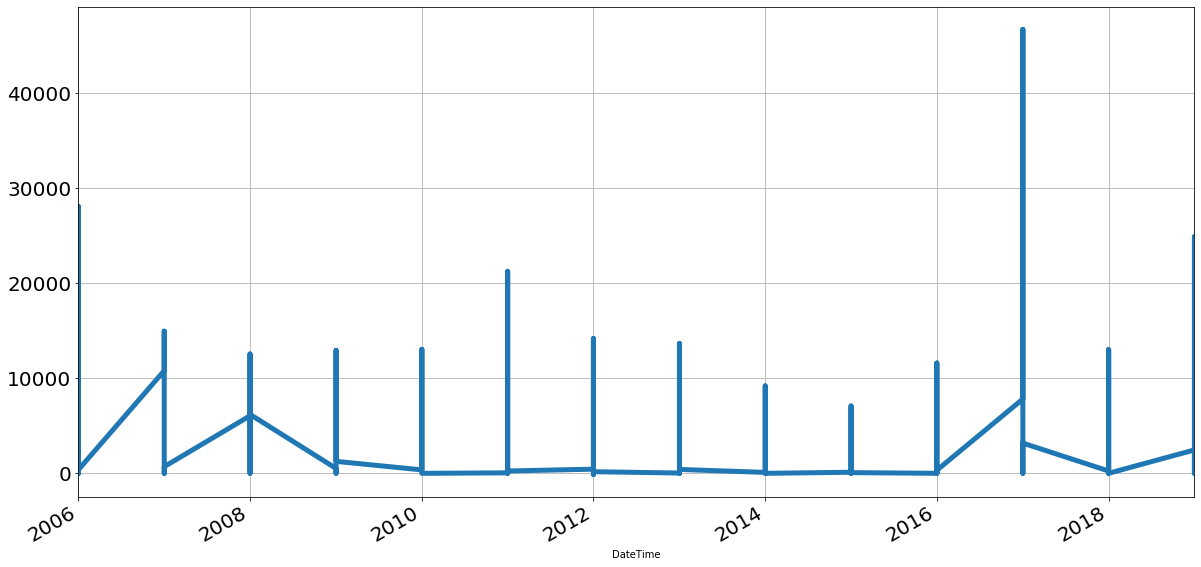

In [355]:
merged_outflow_codes_filter = merged_outflow_codes[merged_outflow_codes['Year'] > 2005]
merged_outflow_codes_filter['DateTime']  = pd.to_datetime(merged_outflow_codes_filter['Year'],format='%Y')
merged_outflow_codes_filter.set_index('DateTime', inplace=True)
merged_outflow_codes_filter['PortableWaterInGallons'].plot(figsize=(20,10), linewidth=5, fontsize=20, grid=True)


In [356]:
waterUsage['DateTime'] = pd.to_datetime(waterUsage['Year'],format='%Y')
waterUsage.head()

,Year,STATE,STATEFIPS,COUNTYFIPS,FIPS,State-County Name,TP-TotPop,TO-WGWFr,TO-WGWSa,TO-WGWTo,TO-WSWFr,TO-WSWSa,TO-WSWTo,TO-WFrTo,TO-WSaTo,TO-WTotl,DateTime
0,2005,CA,6,1,6001,California-Alameda County,1448.905,64.48,0.00,64.48,107.28,0.0,107.28,171.76,0.00,171.76,2005-01-01
1,2005,CA,6,3,6003,California-Alpine County,1.159,0.03,0.00,0.03,15.08,0.0,15.08,15.11,0.00,15.11,2005-01-01
2,2005,CA,6,5,6005,California-Amador County,38.471,4.04,0.00,4.04,20.02,0.0,20.02,24.06,0.00,24.06,2005-01-01
3,2005,CA,6,7,6007,California-Butte County,214.185,308.21,0.38,308.59,481.35,0.0,481.35,789.56,0.38,789.94,2005-01-01
4,2005,CA,6,9,6009,California-Calaveras County,46.871,7.40,0.00,7.40,9.89,0.0,9.89,17.29,0.00,17.29,2005-01-01


In [0]:
waterUsage.set_index('DateTime',inplace=True)


In [358]:
waterUsage.head()

,Year,STATE,STATEFIPS,COUNTYFIPS,FIPS,State-County Name,TP-TotPop,TO-WGWFr,TO-WGWSa,TO-WGWTo,TO-WSWFr,TO-WSWSa,TO-WSWTo,TO-WFrTo,TO-WSaTo,TO-WTotl
DateTime,,,,,,,,,,,,,,,,
2005-01-01,2005,CA,6,1,6001,California-Alameda County,1448.905,64.48,0.00,64.48,107.28,0.0,107.28,171.76,0.00,171.76
2005-01-01,2005,CA,6,3,6003,California-Alpine County,1.159,0.03,0.00,0.03,15.08,0.0,15.08,15.11,0.00,15.11
2005-01-01,2005,CA,6,5,6005,California-Amador County,38.471,4.04,0.00,4.04,20.02,0.0,20.02,24.06,0.00,24.06
2005-01-01,2005,CA,6,7,6007,California-Butte County,214.185,308.21,0.38,308.59,481.35,0.0,481.35,789.56,0.38,789.94
2005-01-01,2005,CA,6,9,6009,California-Calaveras County,46.871,7.40,0.00,7.40,9.89,0.0,9.89,17.29,0.00,17.29


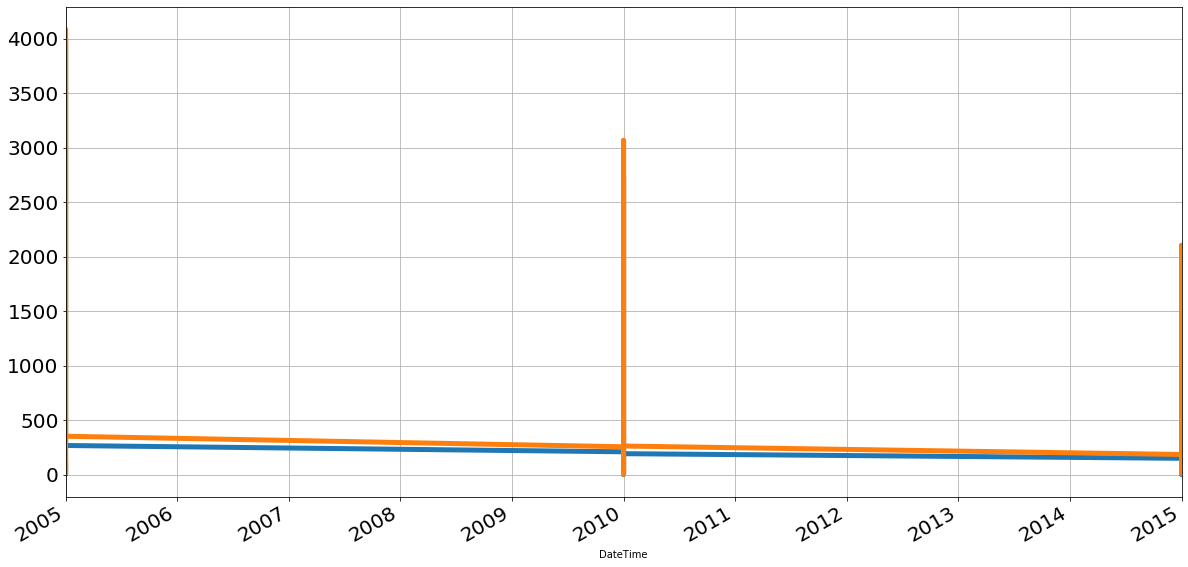

In [359]:
waterUsage['TO-WSWTo'].plot(figsize=(20,10), linewidth=5, fontsize=20, grid=True)
#waterUsage['TO-WFrTo'].plot(figsize=(20,10), linewidth=5, fontsize=20, grid=True)
waterUsage['TO-WTotl'].plot(figsize=(20,10), linewidth=5, fontsize=20, grid=True)

In [0]:
merged_outflow_filtered = merged_outflow_codes.groupby(['Year','CountyCode'])['PortableWaterInGallons'].mean().reset_index()


In [361]:
merged_outflow_filtered.head()

,Year,CountyCode,PortableWaterInGallons
0,2005,6007,138.611111
1,2005,6009,2797.447222
2,2005,6019,2871.134722
3,2005,6029,1572.713889
4,2005,6033,7891.194444


In [362]:
waterUsage.head()

,Year,STATE,STATEFIPS,COUNTYFIPS,FIPS,State-County Name,TP-TotPop,TO-WGWFr,TO-WGWSa,TO-WGWTo,TO-WSWFr,TO-WSWSa,TO-WSWTo,TO-WFrTo,TO-WSaTo,TO-WTotl
DateTime,,,,,,,,,,,,,,,,
2005-01-01,2005,CA,6,1,6001,California-Alameda County,1448.905,64.48,0.00,64.48,107.28,0.0,107.28,171.76,0.00,171.76
2005-01-01,2005,CA,6,3,6003,California-Alpine County,1.159,0.03,0.00,0.03,15.08,0.0,15.08,15.11,0.00,15.11
2005-01-01,2005,CA,6,5,6005,California-Amador County,38.471,4.04,0.00,4.04,20.02,0.0,20.02,24.06,0.00,24.06
2005-01-01,2005,CA,6,7,6007,California-Butte County,214.185,308.21,0.38,308.59,481.35,0.0,481.35,789.56,0.38,789.94
2005-01-01,2005,CA,6,9,6009,California-Calaveras County,46.871,7.40,0.00,7.40,9.89,0.0,9.89,17.29,0.00,17.29


In [363]:
merged_outflow_filtered[(merged_outflow_filtered['Year'] == 2009) &  (merged_outflow_filtered['CountyCode'] == 6007)]

,Year,CountyCode,PortableWaterInGallons
64,2009,6007,329.05


In [364]:
merged = pd.merge(waterUsage,merged_outflow_filtered,how='inner', left_on=['Year','FIPS'], right_on=['Year','CountyCode'])
merged.head(2)

,Year,STATE,STATEFIPS,COUNTYFIPS,FIPS,State-County Name,TP-TotPop,TO-WGWFr,TO-WGWSa,TO-WGWTo,TO-WSWFr,TO-WSWSa,TO-WSWTo,TO-WFrTo,TO-WSaTo,TO-WTotl,CountyCode,PortableWaterInGallons
0,2005,CA,6,7,6007,California-Butte County,214.185,308.21,0.38,308.59,481.35,0.0,481.35,789.56,0.38,789.94,6007,138.611111
1,2005,CA,6,9,6009,California-Calaveras County,46.871,7.40,0.00,7.40,9.89,0.0,9.89,17.29,0.00,17.29,6009,2797.447222


In [365]:
merged.head(2)

,Year,STATE,STATEFIPS,COUNTYFIPS,FIPS,State-County Name,TP-TotPop,TO-WGWFr,TO-WGWSa,TO-WGWTo,TO-WSWFr,TO-WSWSa,TO-WSWTo,TO-WFrTo,TO-WSaTo,TO-WTotl,CountyCode,PortableWaterInGallons
0,2005,CA,6,7,6007,California-Butte County,214.185,308.21,0.38,308.59,481.35,0.0,481.35,789.56,0.38,789.94,6007,138.611111
1,2005,CA,6,9,6009,California-Calaveras County,46.871,7.40,0.00,7.40,9.89,0.0,9.89,17.29,0.00,17.29,6009,2797.447222


In [366]:
merged.columns

Index(['Year', 'STATE', 'STATEFIPS', 'COUNTYFIPS', 'FIPS', 'State-County Name',
       'TP-TotPop', 'TO-WGWFr', 'TO-WGWSa', 'TO-WGWTo', 'TO-WSWFr', 'TO-WSWSa',
       'TO-WSWTo', 'TO-WFrTo', 'TO-WSaTo', 'TO-WTotl', 'CountyCode',
       'PortableWaterInGallons'],
      dtype='object')

In [367]:
columns = ['FIPS','TP-TotPop','PortableWaterInGallons']
merged_filter = merged[columns]
merged_filter.head()

,FIPS,TP-TotPop,PortableWaterInGallons
0,6007,214.185,138.611111
1,6009,46.871,2797.447222
2,6019,877.584,2871.134722
3,6029,756.825,1572.713889
4,6033,65.147,7891.194444


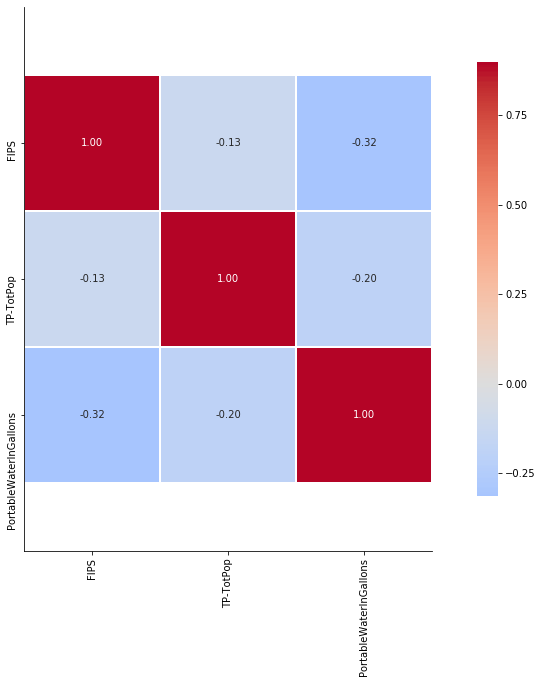

In [368]:
corr = merged_filter.corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=.9, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 10)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57]), <a list of 58 Text xticklabel objects>)

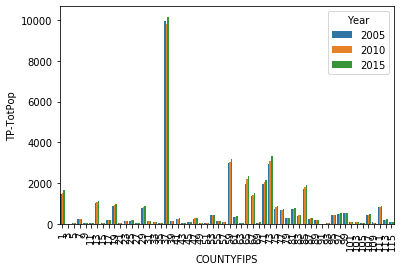

In [369]:
sns.barplot(x='COUNTYFIPS', y='TP-TotPop', hue='Year', data=waterUsage, saturation=0.8)
plt.xticks(rotation=90)

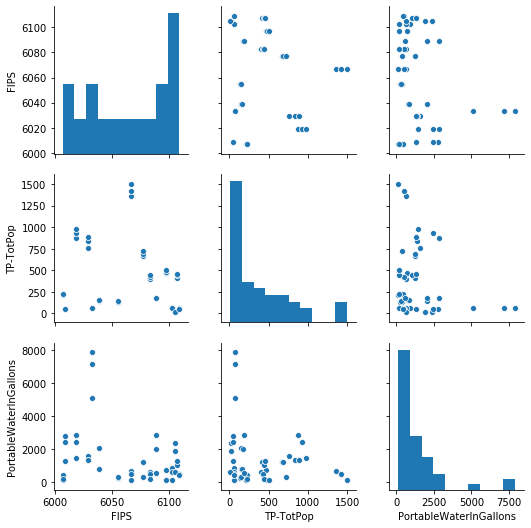

In [370]:
sns.pairplot(merged_filter)

In [371]:
columns=['TP-TotPop','TO-WGWTo','TO-WSWTo','TO-WTotl','PortableWaterInGallons']
merged_filtered_data = merged[columns]
merged_filtered_data.head()

,TP-TotPop,TO-WGWTo,TO-WSWTo,TO-WTotl,PortableWaterInGallons
0,214.185,308.59,481.35,789.94,138.611111
1,46.871,7.40,9.89,17.29,2797.447222
2,877.584,868.29,2391.93,3260.22,2871.134722
3,756.825,1143.42,1520.13,2663.55,1572.713889
4,65.147,27.16,18.06,45.22,7891.194444


In [372]:
merged_filter.shape

(48, 3)

In [0]:
trainData, testData = train_test_split(merged_filter, train_size=0.7, random_state=100)


In [374]:
Y_trainData = trainData['TO-WTotl']
X_trainData= trainData.drop('TO-WTotl', axis =1 )

Y_testData = testData['TO-WTotl']
X_testData= testData.drop('TO-WTotl', axis =1 )


KeyError: ignored

In [0]:
from sklearn import linear_model

clf = linear_model.LinearRegression()
clf.fit(X_trainData, Y_trainData)
predictions = clf.predict(X_testData)

In [0]:
y_train1 = np.asarray(Y_trainData.values, dtype="int")
y_test1 = np.asarray(Y_testData.values, dtype="float")

In [0]:
model1.fit(X_trainData,y_train1)
predictions = model1.predict(X_testData)

In [0]:
y_test1,predictions

In [0]:
accuracy_score(predictions,y_test1)*100

In [0]:
accuracy_score(y_test1,predictions)*100

In [0]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_trainData,y_train1)

y_pred=clf.predict(X_testData)

In [0]:
accuracy_score(y_test1,y_pred)*100

In [0]:
waterUsage.head()